In [1]:
import numpy as np
import pandas as pd

##Importing Dataset


In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


##Getting Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


##Ananlysising Data

In [10]:
import matplotlib.pyplot as plt


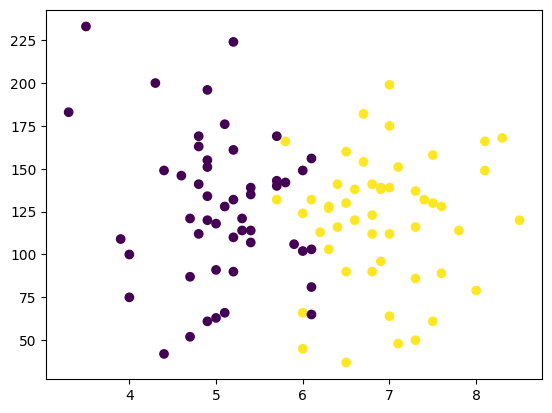

In [16]:
plt.scatter(df.cgpa,df.iq,c=df.placement)

## Seperating input and output

In [18]:
x = df[['cgpa','iq']]
y = df['placement']

In [19]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

## Spilting Data

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
train_test_split(x,y,test_size=0.1)

[    cgpa     iq
 19   5.2  132.0
 51   4.8  141.0
 78   6.1   81.0
 43   6.8  141.0
 44   7.5   61.0
 ..   ...    ...
 49   5.4  135.0
 81   5.4  107.0
 20   6.6  120.0
 57   6.5  130.0
 75   4.8  169.0
 
 [90 rows x 2 columns],
     cgpa     iq
 61   7.3  137.0
 87   5.7  132.0
 66   6.9   96.0
 95   4.3  200.0
 4    5.8  142.0
 60   6.9  139.0
 28   5.2   90.0
 83   7.5  130.0
 62   6.0  102.0
 39   4.6  146.0,
 19    0
 51    0
 78    0
 43    1
 44    1
      ..
 49    0
 81    0
 20    1
 57    1
 75    0
 Name: placement, Length: 90, dtype: int64,
 61    1
 87    1
 66    1
 95    0
 4     0
 60    1
 28    0
 83    1
 62    0
 39    0
 Name: placement, dtype: int64]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [50]:
x_train.head()

,cgpa,iq
41,5.4,114.0
57,6.5,130.0
15,5.1,176.0
50,3.5,233.0
47,5.2,161.0


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
x_train = scaler.fit_transform(x_train)

In [54]:
x_train

array([[-0.50331357, -0.21776026],
       [ 0.46799332,  0.1832305 ],
       [-0.76821546,  1.33607896],
       [-2.18102549,  2.76460857],
       [-0.67991483,  0.96015012],
       [-0.50331357,  0.40878781],
       [-0.67991483,  2.53905126],
       [ 0.90949646,  1.91250319],
       [ 0.90949646,  0.40878781],
       [-0.5916142 , -0.0423268 ],
       [ 0.55629395,  0.38372589],
       [ 0.11479082, -0.49344142],
       [ 0.02649019,  0.65940704],
       [-0.76821546,  0.13310666],
       [ 1.88080336,  0.65940704],
       [ 0.73289521, -0.26788411],
       [-0.50331357,  0.30854012],
       [ 0.20309144, -0.24282219],
       [ 0.29139207,  0.13310666],
       [-0.94481671,  1.83731742],
       [ 0.11479082,  0.8348405 ],
       [ 1.26269897,  0.23335435],
       [-2.35762674,  1.51151242],
       [ 1.43930022, -0.84430834],
       [ 0.73289521,  0.45891166],
       [-1.82782298, -0.34306988],
       [-0.94481671,  0.80977858],
       [-0.15011107,  1.08545973],
       [-1.03311734,

In [55]:
x_test = scaler.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression()

In [59]:
model.score(x_test,y_test)

1.0

In [63]:
y_predict = model.predict(x_test)

In [61]:
y_test

73    0
91    1
29    1
52    1
11    1
74    1
84    0
90    1
18    0
34    0
Name: placement, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_predict,y_test)

1.0

## understanding the pattern

In [65]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

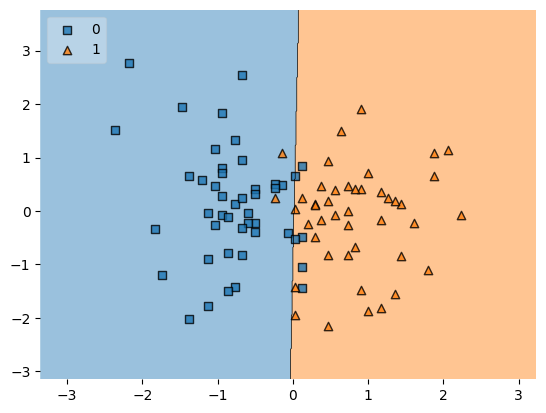

In [66]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

## Saving the data

In [67]:
import pickle

In [69]:
pickle.dump(model,open('model.pkl','wb'))